In [279]:
import pandas as pd
import zipfile
import kaggle
import random
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from PIL import Image
import numpy as np
import string
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer

# Import Dataset from Kaggle

In [4]:
!kaggle datasets download -d andrewmvd/steam-reviews

Dataset URL: https://www.kaggle.com/datasets/andrewmvd/steam-reviews
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)




  0%|          | 0.00/685M [00:00<?, ?B/s]
  0%|          | 1.00M/685M [00:00<02:08, 5.57MB/s]
  1%|          | 6.00M/685M [00:00<00:27, 25.6MB/s]
  1%|▏         | 10.0M/685M [00:00<00:23, 29.6MB/s]
  2%|▏         | 14.0M/685M [00:00<00:25, 27.1MB/s]
  3%|▎         | 18.0M/685M [00:00<00:22, 30.8MB/s]
  4%|▎         | 24.0M/685M [00:00<00:17, 39.0MB/s]
  4%|▍         | 29.0M/685M [00:00<00:18, 38.1MB/s]
  5%|▍         | 33.0M/685M [00:01<00:20, 33.0MB/s]
  6%|▌         | 39.0M/685M [00:01<00:16, 40.1MB/s]
  6%|▋         | 44.0M/685M [00:01<00:18, 36.6MB/s]
  7%|▋         | 49.0M/685M [00:01<00:22, 30.1MB/s]
  8%|▊         | 55.0M/685M [00:01<00:19, 34.7MB/s]
  9%|▊         | 59.0M/685M [00:01<00:19, 33.8MB/s]
  9%|▉         | 65.0M/685M [00:02<00:19, 33.7MB/s]
 11%|█         | 72.0M/685M [00:02<00:16, 39.2MB/s]
 11%|█         | 76.0M/685M [00:02<00:19, 33.6MB/s]
 12%|█▏        | 81.0M/685M [00:02<00:20, 30.7MB/s]
 13%|█▎        | 87.0M/685M [00:02<00:17, 36.6MB/s]
 13%|█▎        | 91.

In [5]:
zipfile_name = 'steam-reviews.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [3]:
games = pd.read_csv('dataset.csv')

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6417106 entries, 0 to 6417105
Data columns (total 5 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   app_id        int64 
 1   app_name      object
 2   review_text   object
 3   review_score  int64 
 4   review_votes  int64 
dtypes: int64(3), object(2)
memory usage: 244.8+ MB


In [5]:
games.shape

(6417106, 5)

In [6]:
games

,app_id,app_name,review_text,review_score,review_votes
0,10,Counter-Strike,Ruined my life.,1,0
1,10,Counter-Strike,This will be more of a ''my experience with th...,1,1
2,10,Counter-Strike,This game saved my virginity.,1,0
3,10,Counter-Strike,• Do you like original games? • Do you like ga...,1,0
4,10,Counter-Strike,"Easy to learn, hard to master.",1,1
...,...,...,...,...,...
6417101,99910,Puzzle Pirates,I really ove this game but it needs somethings...,-1,0
6417102,99910,Puzzle Pirates,"Used to play Puzzel Pirates 'way back when', b...",-1,0
6417103,99910,Puzzle Pirates,"This game was aright, though a bit annoying. W...",-1,0
6417104,99910,Puzzle Pirates,"I had a nice review to recommend this game, bu...",-1,0


In [7]:
games.app_name.value_counts()

app_name
PAYDAY 2                                88973
DayZ                                    88850
Terraria                                84828
Rust                                    77037
Dota 2                                  73541
                                        ...  
Memory Oblivion Box                         1
Groggers!                                   1
UnderWater Adventure                        1
Ke-Tsu-No-Ana                               1
Professor Teaches® Access 2013 & 365        1
Name: count, Length: 9363, dtype: int64

In [9]:
games.review_text = games.review_text.astype('str')

# Analysis and Visualization

In [8]:
games.review_score.value_counts()

review_score
 1    5260420
-1    1156686
Name: count, dtype: int64

In [15]:
random.seed(123)
#getting a random sample of 10,000 so that it is easier to work with
games = games.sample(frac=0.02)

In [16]:
games.shape

(128342, 5)

In [36]:
games.isna().sum()

app_id             0
app_name        3612
review_text        0
review_score       0
review_votes       0
dtype: int64

In [37]:
games = games.dropna(axis=0, how='any')

In [38]:
games.isna().sum()

app_id          0
app_name        0
review_text     0
review_score    0
review_votes    0
dtype: int64

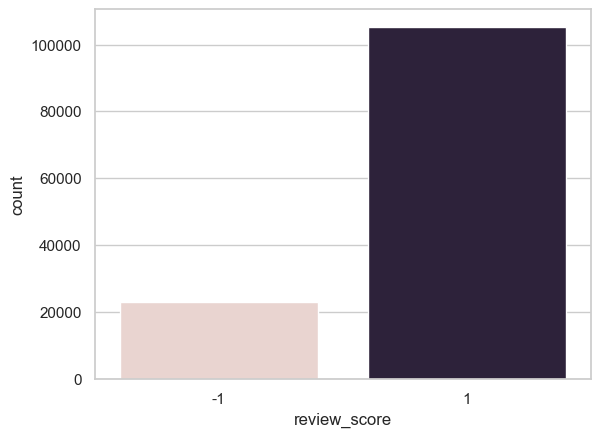

In [33]:
sns.set_theme(style='whitegrid')
sns.set_palette('pastel')
x = sns.countplot(x='review_score', data=games, hue='review_score')
x.legend_.remove()

There are more positive reviews than negative.

## Word Cloud of Reviews

In [41]:
games.head()

,app_id,app_name,review_text,review_score,review_votes
1063777,218060,BIT.TRIP Presents... Runner2: Future Legend of...,Major improvements over the first of the serie...,1,0
1385429,221100,DayZ,Early Access Review,-1,0
4843679,372000,Tree of Savior (English Ver.),You are a wizard harry. Yes i am. An uninstal...,1,1
2078090,237350,Frozen Cortex,Wot do I think? I think this game is aF--kingm...,1,0
67287,105000,A New Beginning - Final Cut,This game is translated from swedish so read o...,-1,0


In [55]:
positive = games[games['review_score']==1]
negative = games[games['review_score']==-1]

Positive Reviews Word Cloud:

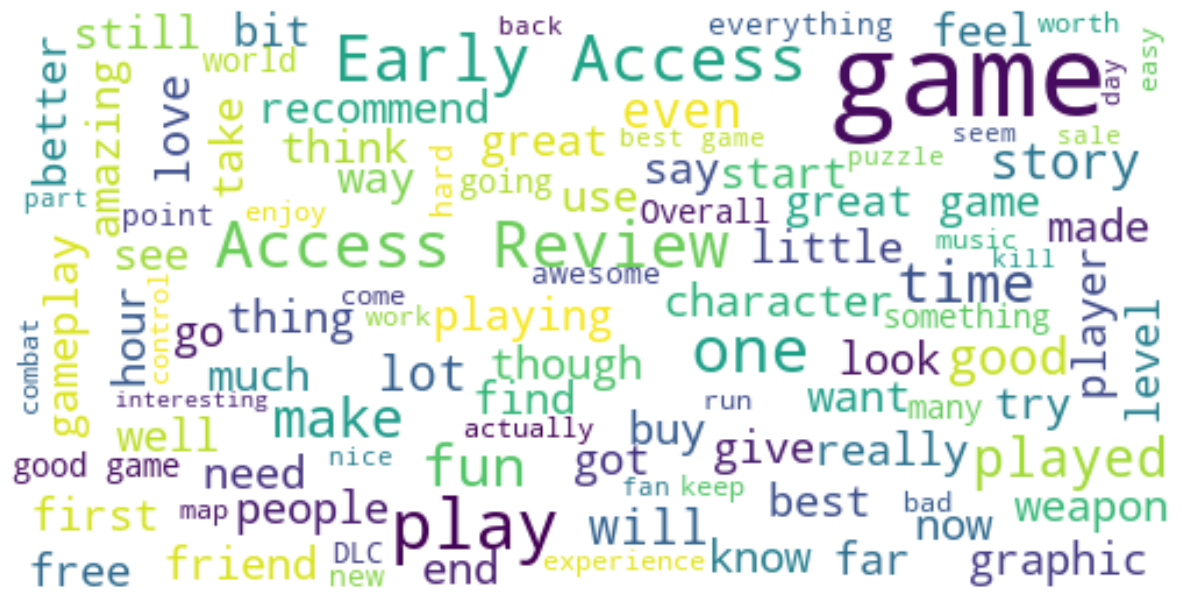

In [57]:
txt = ' '.join(rev for rev in positive.review_text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 50,
            max_words = 100,
            width = 500,
            height = 250
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

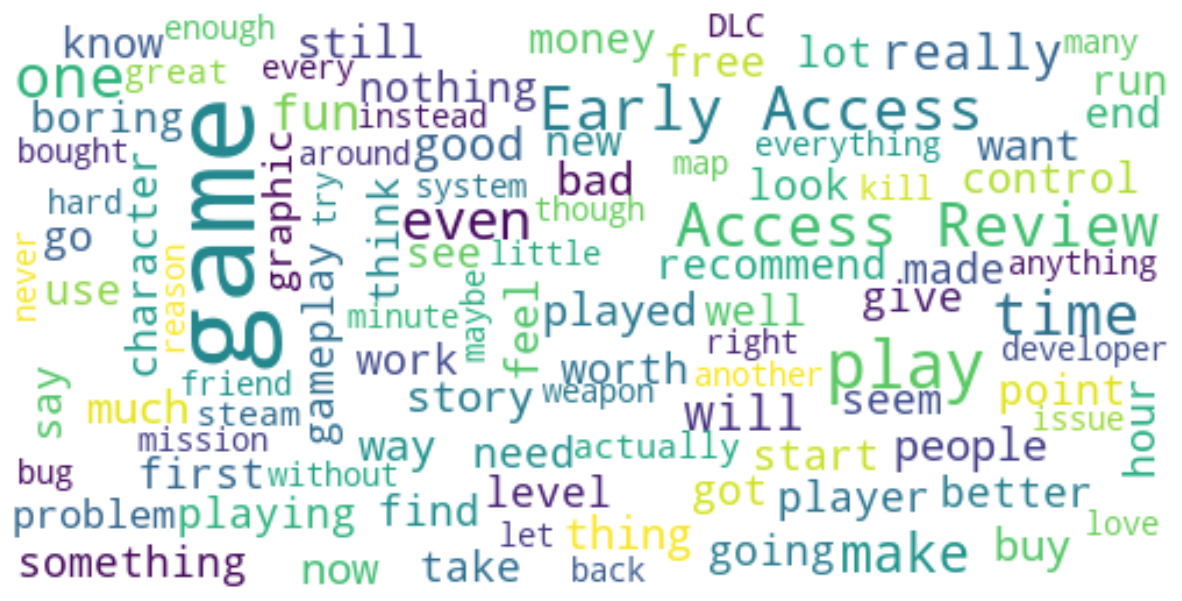

In [58]:
txt = ' '.join(rev for rev in negative.review_text)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 50,
            max_words = 100,
            width = 500,
            height = 250
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [62]:
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hicks\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
games = games.drop_duplicates(keep='first')

In [64]:
games.shape

(106426, 5)

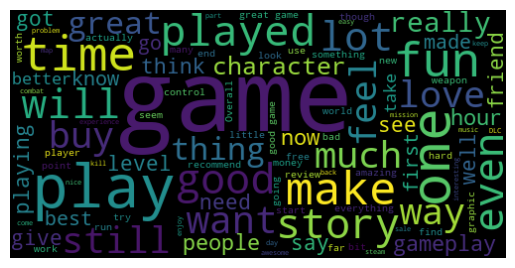

In [71]:
txt = " ".join(rev for rev in games.review_text)

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 500,
            height = 250
            ).generate(txt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [82]:
steam_mask = np.array(Image.open("img/steam_logo.png"))
steam_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

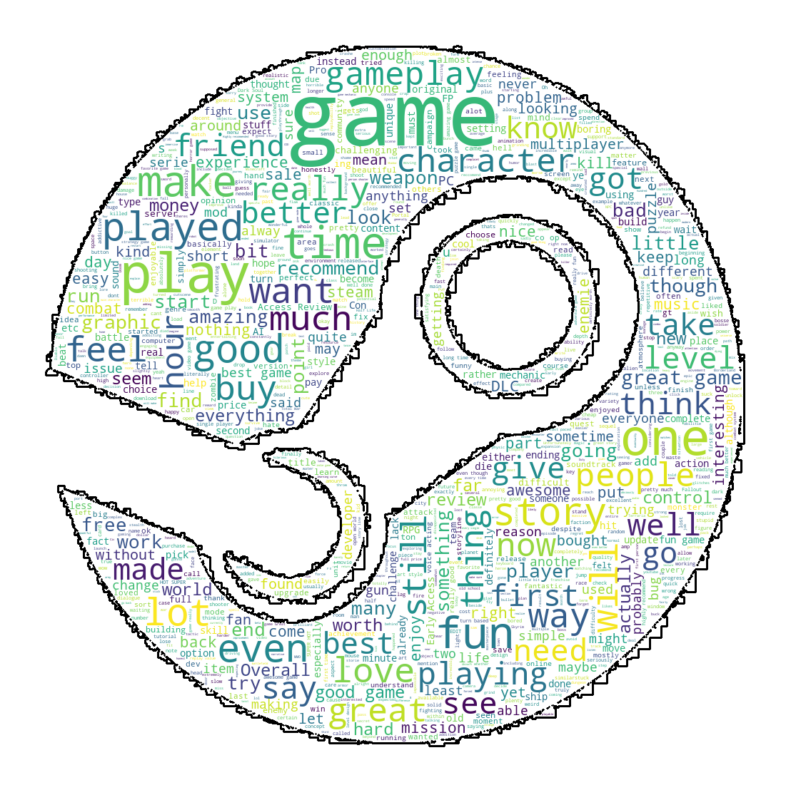

In [83]:
# Create a word cloud image
txt = " ".join(rev for rev in games.review_text)
wc = WordCloud(background_color="white", 
               max_words=1000, 
               mask=steam_mask,
                contour_width=3, 
                contour_color='black')

# Generate a wordcloud
wc.generate(txt)

# store to file
wc.to_file("img/wine.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [84]:
wc.to_file("img/steam_wc.png")

# Data Cleaning

In [213]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\hicks\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\hicks\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\hicks\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\hicks\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\hicks\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [304]:
#separate reviews dataframe for modeling
reviews = games[['review_score', 'review_text']]
reviews.head()

,review_score,review_text
1063777,1,Major improvements over the first of the serie...
1385429,-1,Early Access Review
4843679,1,You are a wizard harry. Yes i am. An uninstal...
2078090,1,Wot do I think? I think this game is aF--kingm...
67287,-1,This game is translated from swedish so read o...


I noticed at  that there was a review that said "Early Access Review". According to Steam Support website, an Early Access review  is defined as "a unique development model that allows games to be played as they progress towards a full release. Early Access encourages ongoing updates from developers, while letting players participate in direct feedback through gameplay and community involvement." So these reviews were made during a game's development and should not be considered for the final product of the game. I will remove these reviews.

In [305]:
#getting a dataframe that does not contain the early access reviews
filter = reviews['review_text'].str.contains("Early Access Review")
reviews = reviews[~filter]
print(reviews.shape)
print(reviews['review_score'].value_counts())
print(reviews.head())

(104633, 2)
review_score
 1    86667
-1    17966
Name: count, dtype: int64
         review_score                                        review_text
1063777             1  Major improvements over the first of the serie...
4843679             1  You are a wizard harry.  Yes i am. An uninstal...
2078090             1  Wot do I think? I think this game is aF--kingm...
67287              -1  This game is translated from swedish so read o...
1117273             1  You don't know what a ninja is until you've me...


In [306]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())

    #stemming the text
    #ps = PorterStemmer()
    #stemmed_words = [ps.stem(token) for token in tokens]

    # Remove stop words
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Lemmatize the tokens
    #lemmatizer = WordNetLemmatizer()
    #lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(filtered_tokens)
    return processed_text
# apply the function df

In [330]:
reviews['clean_text'] = reviews['review_text'].apply(preprocess_text)
reviews.head()

,review_score,review_text,clean_text
1063777,1,Major improvements over the first of the serie...,major improvements first series come mind minu...
4843679,1,You are a wizard harry. Yes i am. An uninstal...,wizard harry . yes . uninstall wizard .
2078090,1,Wot do I think? I think this game is aF--kingm...,wot think ? think game af -- kingmazing ! ! ! ...
67287,-1,This game is translated from swedish so read o...,game translated swedish read subtitles best sw...
1117273,1,You don't know what a ninja is until you've me...,n't know ninja 've met cloaker . n't know tank...


In [331]:
clean_reviews = reviews.copy()
clean_reviews = clean_reviews.drop('review_text', axis=1)
clean_reviews.head()

,review_score,clean_text
1063777,1,major improvements first series come mind minu...
4843679,1,wizard harry . yes . uninstall wizard .
2078090,1,wot think ? think game af -- kingmazing ! ! ! ...
67287,-1,game translated swedish read subtitles best sw...
1117273,1,n't know ninja 've met cloaker . n't know tank...


In [260]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [288]:
#function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [289]:
#remove excess white spaces
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string

In [290]:
def tokenization(text):
    tokens =  re.split(" ", text)
    return tokens

In [332]:
def cleaning(df, reviews):
    df[reviews] = df[reviews].str.lower()
    df[reviews] = df[reviews].apply(remove_punctuation)
    df[reviews] = df[reviews].apply(unify_whitespaces)
    #df[reviews] = df[reviews].apply(tokenization)

In [333]:
cleaning(clean_reviews, 'clean_text')

In [334]:
clean_reviews.head()

,review_score,clean_text
1063777,1,major improvements first series come mind minu...
4843679,1,wizard harry yes uninstall wizard
2078090,1,wot think think game af kingmazing chance with...
67287,-1,game translated swedish read subtitles best sw...
1117273,1,nt know ninja ve met cloaker nt know tank ve m...


In [336]:
viz_df = clean_reviews.copy()
viz_df.head()

,review_score,clean_text
1063777,1,major improvements first series come mind minu...
4843679,1,wizard harry yes uninstall wizard
2078090,1,wot think think game af kingmazing chance with...
67287,-1,game translated swedish read subtitles best sw...
1117273,1,nt know ninja ve met cloaker nt know tank ve m...


In [337]:
viz_df['clean_text'] = viz_df['clean_text'].apply(tokenization)

In [341]:
top = Counter([item for sublist in viz_df['clean_text'] for item in sublist])
temp = pd.DataFrame(top.most_common(50))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,game,162664
1,like,34436
2,play,27324
3,good,25802
4,get,25651
5,one,25152
6,fun,24217
7,really,21480
8,great,21376
9,games,20670


In [340]:
for i in viz_df['clean_text']:
    for x in i:
        if x == '' or x==" " or x=='s' or x=='nt':
            i.remove(x)
   
clean_reviews.head()

,review_score,clean_text
1063777,1,major improvements first series come mind minu...
4843679,1,wizard harry yes uninstall wizard
2078090,1,wot think think game af kingmazing chance with...
67287,-1,game translated swedish read subtitles best sw...
1117273,1,nt know ninja ve met cloaker nt know tank ve m...


In [342]:
top = Counter([item for sublist in viz_df['clean_text'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,game,162664
1,like,34436
2,play,27324
3,good,25802
4,get,25651
5,one,25152
6,fun,24217
7,really,21480
8,great,21376
9,games,20670


In [347]:
positive = viz_df[viz_df['review_score']==1]
negative = viz_df[viz_df['review_score']==-1]

In [348]:
top = Counter([item for sublist in positive['clean_text'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,game,128272
1,like,26881
2,good,21761
3,play,21635
4,fun,21265
5,one,20645
6,great,19554
7,get,19518
8,games,17242
9,really,17208


In [349]:
top = Counter([item for sublist in negative['clean_text'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,game,34392
1,like,7555
2,get,6133
3,play,5689
4,even,4917
5,one,4507
6,time,4493
7,really,4272
8,would,4190
9,good,4041


# Text Classifier Model

## VADER

In [350]:
clean_reviews.head()

,review_score,clean_text
1063777,1,major improvements first series come mind minu...
4843679,1,wizard harry yes uninstall wizard
2078090,1,wot think think game af kingmazing chance with...
67287,-1,game translated swedish read subtitles best sw...
1117273,1,nt know ninja ve met cloaker nt know tank ve m...


In [351]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment


In [352]:
# apply get_sentiment function

clean_reviews['sentiment'] = clean_reviews['clean_text'].apply(get_sentiment)

clean_reviews.head()

,review_score,clean_text,sentiment
1063777,1,major improvements first series come mind minu...,1
4843679,1,wizard harry yes uninstall wizard,1
2078090,1,wot think think game af kingmazing chance with...,1
67287,-1,game translated swedish read subtitles best sw...,1
1117273,1,nt know ninja ve met cloaker nt know tank ve m...,1


In [358]:
clean_reviews['review_score'].replace(-1, 0, inplace=True)
clean_reviews.head()

C:\Users\hicks\AppData\Local\Temp\ipykernel_5416\2720151535.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_reviews['review_score'].replace(-1, 0, inplace=True)


,review_score,clean_text,sentiment
1063777,1,major improvements first series come mind minu...,1
4843679,1,wizard harry yes uninstall wizard,1
2078090,1,wot think think game af kingmazing chance with...,1
67287,0,game translated swedish read subtitles best sw...,1
1117273,1,nt know ninja ve met cloaker nt know tank ve m...,1


Since the sentiment intensity analyzer uses 0 and 1 for positive and negative reviews, we must change the values in the review score to reflect that as well. 1= positive 0 = negative

In [359]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(clean_reviews['review_score'], clean_reviews['sentiment']))

[[ 3782 14184]
 [10436 76231]]


In [360]:
from sklearn.metrics import classification_report

print(classification_report(clean_reviews['review_score'], clean_reviews['sentiment']))

              precision    recall  f1-score   support

           0       0.27      0.21      0.24     17966
           1       0.84      0.88      0.86     86667

    accuracy                           0.76    104633
   macro avg       0.55      0.55      0.55    104633
weighted avg       0.74      0.76      0.75    104633



The results of the nltk built in sentiment intensity analyzer produced an accuracy of 76%